# Import Libraries

In [1]:
# Import all necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import *
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

# Exploratory Data Analysis

In [2]:
# Load the online shoppers inrension dataset
dataset = pd.read_csv('online_shoppers_intention.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
dataset.shape

(12330, 18)

In [4]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
dataset.describe(include = object)

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


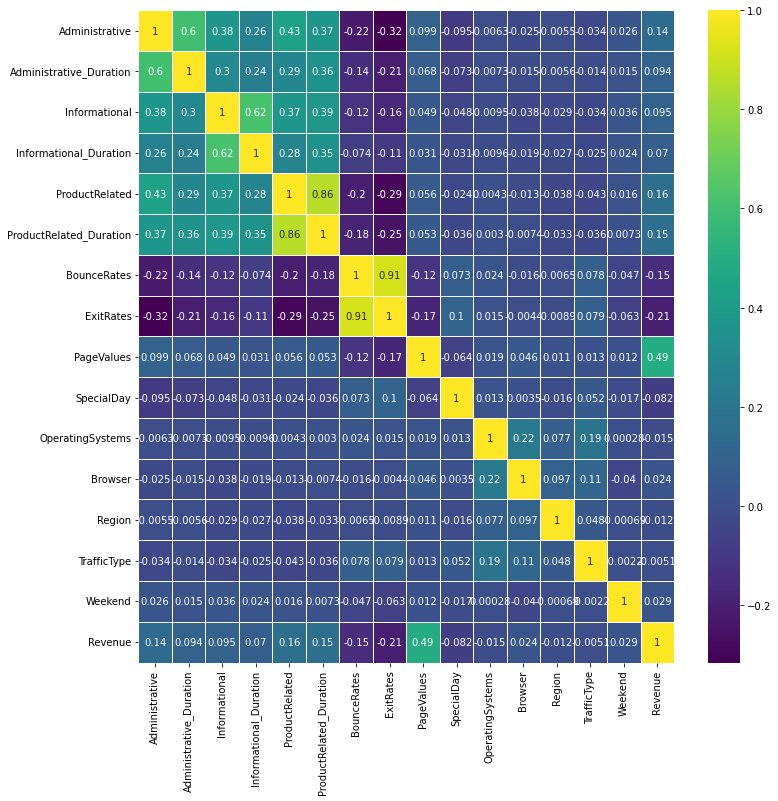

In [6]:
correlation = dataset.corr()
figure(figsize=(12,12))
sns.heatmap(correlation,annot=True,cmap='viridis',linewidths=.5)
savefig('corr.jpg')

In [7]:
dataset.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
dataset.duplicated().sum()

125

In [9]:
dataset=dataset.drop_duplicates()

In [10]:
dataset.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

# Data Visualization of Revenue based on different Sessions

<AxesSubplot:xlabel='Revenue', ylabel='Informational_Duration'>

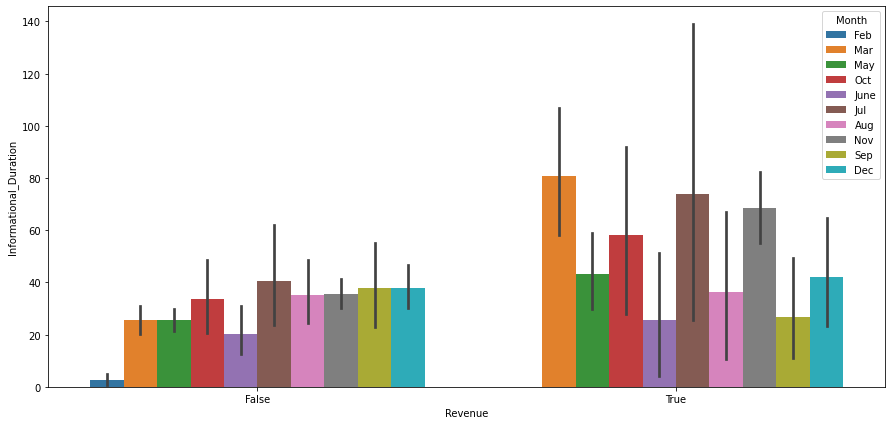

In [12]:
figure(figsize=(15,7))
sns.barplot(y='Informational_Duration',x='Revenue',data=dataset,hue='Month')

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

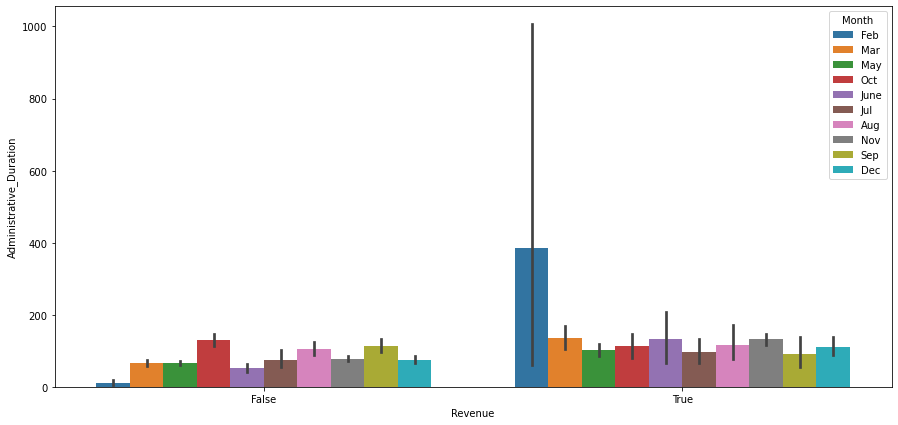

In [13]:
figure(figsize=(15,7))
sns.barplot(y='Administrative_Duration',x='Revenue',data=dataset,hue='Month')

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

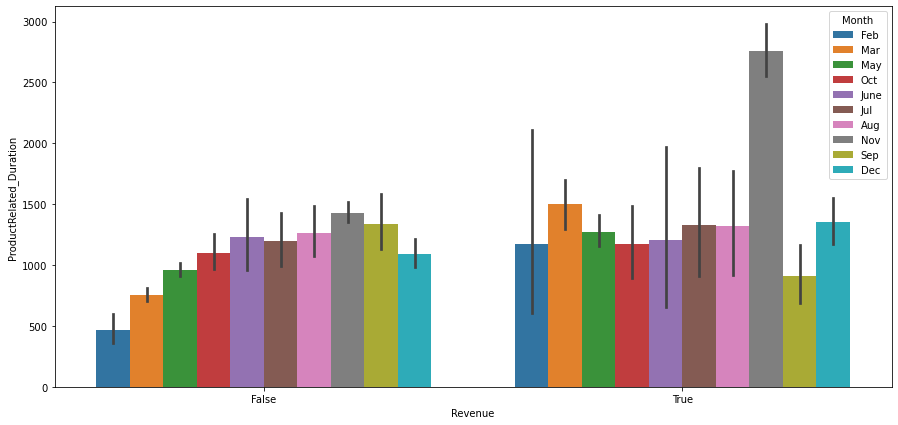

In [14]:
figure(figsize=(15,7))
sns.barplot(y='ProductRelated_Duration',x='Revenue',data=dataset,hue='Month')

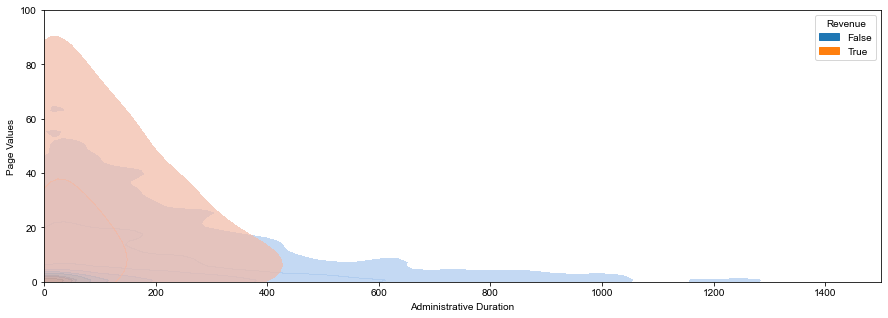

In [15]:
figure(figsize=(15,5))
sns.kdeplot(x='Administrative_Duration',y='PageValues',data=dataset,shade=bool,hue='Revenue',alpha = 0.7)
xlim(0,1500)
ylim(0,100)
xlabel('Administrative Duration')
ylabel('Page Values')
sns.set(font_scale = 2)

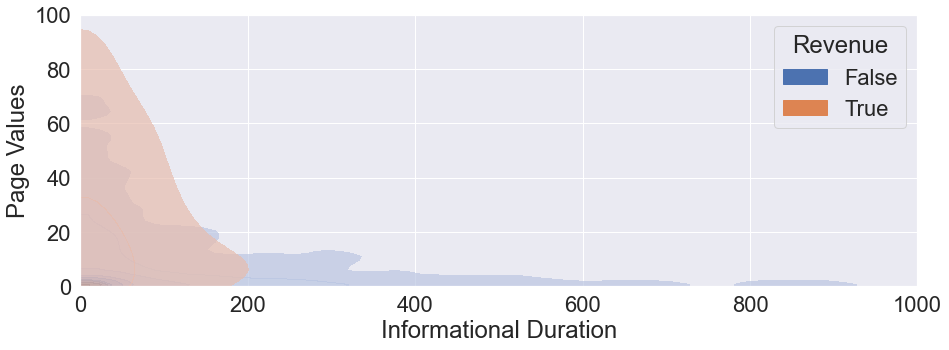

In [16]:
figure(figsize=(15,5))
sns.kdeplot(x='Informational_Duration',y='PageValues',data=dataset,shade=bool,hue='Revenue',alpha = 0.7)
xlim(0,1000)
ylim(0,100)
xlabel('Informational Duration')
ylabel('Page Values')
sns.set(font_scale = 2)

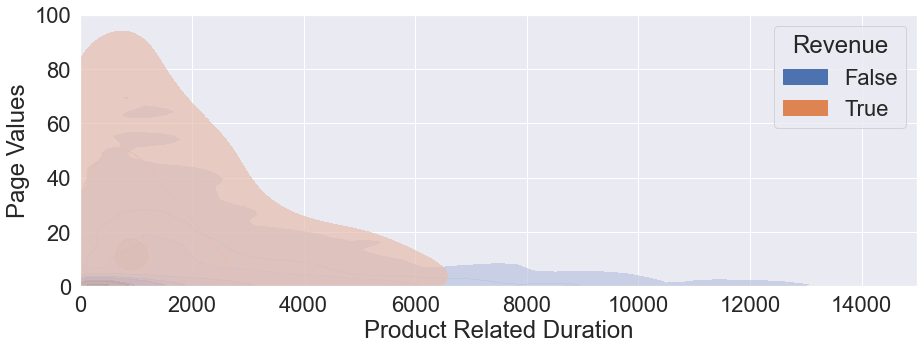

In [17]:
figure(figsize=(15,5))
sns.kdeplot(x='ProductRelated_Duration',y='PageValues',data=dataset,shade=bool,hue='Revenue',alpha = 0.7)
xlim(0,15000)
ylim(0,100)
xlabel('Product Related Duration')
ylabel('Page Values')
sns.set(font_scale = 2)

# Data Preprocessing for Modelling

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [19]:
# Rounding off the float type columns to 1 decimal place.
for col in['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']:
    dataset[col] = round(dataset[col],1)

In [20]:
dataset_decoded = dataset.copy()
dataset_decoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.7,0.0,0.1,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.5,0.0,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.8,0.0,0.0,12.2,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.8,0.0,0.0,0.0,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.2,0.1,0.1,0.0,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.0,0.0,0.0,0.0,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


**OneHotEncoding**

In [21]:
# Encode Non Numeric Categorical Columns
transformer1 = make_column_transformer((OneHotEncoder(), ['Month','VisitorType','Weekend']), remainder='passthrough')
transformed1 = transformer1.fit_transform(dataset_decoded)
dataset_encoded1 = pd.DataFrame(transformed1, columns=transformer1.get_feature_names())

In [22]:
# Encode Numeric Categorical Columns
transformer2 = make_column_transformer((OneHotEncoder(), ['OperatingSystems','Browser','Region','TrafficType']), 
                                       remainder='passthrough')
transformed2 = transformer2.fit_transform(dataset_encoded1)
dataset_encoded2 = pd.DataFrame(transformed2, columns=transformer2.get_feature_names())

In [23]:
dataset_encoded2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   onehotencoder__x0_1                  12205 non-null  object
 1   onehotencoder__x0_2                  12205 non-null  object
 2   onehotencoder__x0_3                  12205 non-null  object
 3   onehotencoder__x0_4                  12205 non-null  object
 4   onehotencoder__x0_5                  12205 non-null  object
 5   onehotencoder__x0_6                  12205 non-null  object
 6   onehotencoder__x0_7                  12205 non-null  object
 7   onehotencoder__x0_8                  12205 non-null  object
 8   onehotencoder__x1_1                  12205 non-null  object
 9   onehotencoder__x1_2                  12205 non-null  object
 10  onehotencoder__x1_3                  12205 non-null  object
 11  onehotencoder__x1_4                  1220

In [24]:
dataset = dataset_encoded2.copy()

In [25]:
cols = dataset.columns.to_list()

In [26]:
dataset = dataset[cols[65:]+cols[:65]]
dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,onehotencoder__x0_Mar,onehotencoder__x0_May,onehotencoder__x0_Nov,onehotencoder__x0_Oct,onehotencoder__x0_Sep,onehotencoder__x1_New_Visitor,onehotencoder__x1_Other,onehotencoder__x1_Returning_Visitor,onehotencoder__x2_False,onehotencoder__x2_True
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,0.0,0,0.0,2,2.7,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0.0,0,0.0,10,627.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.8,0.0,0.0,12.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12201,0,0.0,0,0.0,5,465.8,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12202,0,0.0,0,0.0,6,184.2,0.1,0.1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12203,4,75.0,0,0.0,15,346.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [27]:
# Convert revenue colums to numerical from bool
revenue = dataset['Revenue'].replace(False,0).replace(True,1)
dataset['Revenue'] = revenue
# Categorise the response variable
dataset['Revenue'] = dataset['Revenue'].astype('category')

In [28]:
# Check the count of categories in response variable
dataset['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

The count of rows with revenue as **False** is over 5 times than the count of rows with response as **True**. In order to avoid inaccurate results due to imbalance in the dataset, undersampling was performed to have a ratio of about 3:1.

In [29]:
remove_rows = dataset[dataset['Revenue']==0].sample(n=4000,random_state = 7)
dataset = dataset.drop(remove_rows.index)
dataset.shape
dataset['Revenue'].value_counts()

0    6297
1    1908
Name: Revenue, dtype: int64

In [30]:
dataset.shape

(8205, 76)

# Predictive Analysis

In [31]:
# Function to visualize information of confusion matrix.
def print_confusion_matrix(cf_matrix):
    ax = sns.heatmap(cf_matrix, annot=True, fmt = '',cmap='Blues')
    ax.set_title('Confusion Matrix with labels\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    show()

In [32]:
# Create train and test datasets for cross validation.
X = dataset.drop('Revenue',axis =1)
Y = dataset['Revenue']

# Split into training and test set
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.2, random_state=7)

**K Nearest Neighbours**

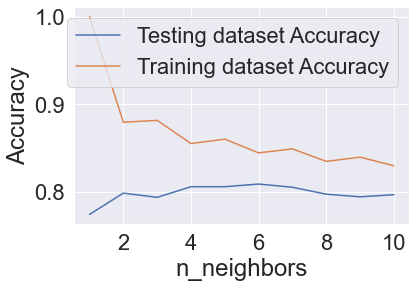

In [33]:
# Identify the appropriate K value for performing KNN classification
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

# Generate plot
plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

legend()
xlabel('n_neighbors')
ylabel('Accuracy')
show()

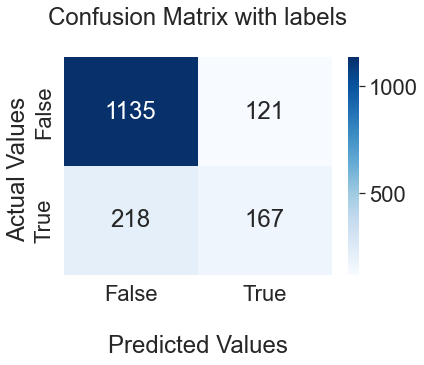


Train Data Scores
Accuracy:  88.15
Precision:  80.86
Recall:  64.08

Test Data Scores
Accuracy:  79.34
Precision:  57.99
Recall:  43.38


In [34]:
# Perform KNN with K as 3
knn = KNeighborsClassifier(n_neighbors=3)
# KFold Cross Validation approach
kf_knn = KFold(n_splits=5,shuffle=True)
kf_knn.split(X_train)    
 
# Iterate over each train-test split
for train_index, test_index in kf_knn.split(X_train):
    # Train the model
    knn.fit(X_train, Y_train)

# Predict on dataset which model has not seen before
Y_KNN = knn.predict(X_test)
print_confusion_matrix(confusion_matrix(Y_test,Y_KNN))

print('\n','Train Data Scores',sep = '')
print('Accuracy: ',round(accuracy_score(Y_train, knn.predict(X_train), normalize=True)*100,2))
print('Precision: ',round(precision_score(Y_train, knn.predict(X_train))*100,2))
print('Recall: ',round(recall_score(Y_train, knn.predict(X_train))*100,2))

print('\n','Test Data Scores',sep = '')
print('Accuracy: ',round(accuracy_score(Y_test, knn.predict(X_test), normalize=True)*100,2))
print('Precision: ',round(precision_score(Y_test, knn.predict(X_test))*100,2))
print('Recall: ',round(recall_score(Y_test, knn.predict(X_test))*100,2))

**Random Forest Classifier**

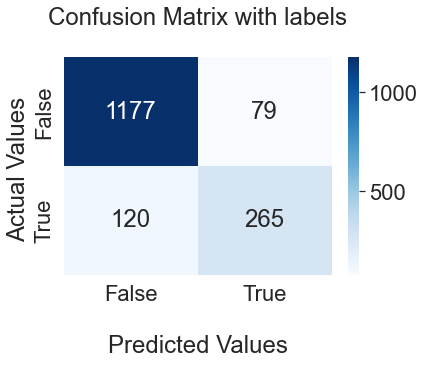


Train Data Scores
Accuracy:  100.0
Precision:  100.0
Recall:  100.0

Test Data Scores
Accuracy:  87.87
Precision:  77.03
Recall:  68.83


In [35]:
# Random Forest Classifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000,random_state = 7)
# KFold Cross Validation approach
kf_rfc = KFold(n_splits=5,shuffle=True)
kf_rfc.split(X_train)    
 
# Iterate over each train-test split
for train_index, test_index in kf_rfc.split(X_train):
    # Train the model
    clf.fit(X_train,Y_train)

Y_RFC=clf.predict(X_test)
print_confusion_matrix(confusion_matrix(Y_test,Y_RFC))

print('\n','Train Data Scores',sep = '')
print('Accuracy: ',round(accuracy_score(Y_train, clf.predict(X_train), normalize=True)*100,2))
print('Precision: ',round(precision_score(Y_train, clf.predict(X_train))*100,2))
print('Recall: ',round(recall_score(Y_train, clf.predict(X_train))*100,2))

print('\n','Test Data Scores',sep = '')
print('Accuracy: ',round(accuracy_score(Y_test, clf.predict(X_test), normalize=True)*100,2))
print('Precision: ',round(precision_score(Y_test, clf.predict(X_test))*100,2))
print('Recall: ',round(recall_score(Y_test, clf.predict(X_test))*100,2))

# Scaling and Principle Component Analysis

In [36]:
# Scale the dataset
dataset_scaled = StandardScaler().fit_transform(dataset.drop('Revenue',axis = 1))

In [37]:
# Perform Principle Component Analysis for Dimensionality reduction
pca = PCA()
pca.fit(dataset_scaled)
pca.explained_variance_ratio_

array([4.87746037e-02, 4.26801070e-02, 3.92091708e-02, 3.29931118e-02,
       2.87681308e-02, 2.75775620e-02, 2.57597831e-02, 2.39911571e-02,
       2.04999960e-02, 1.95936454e-02, 1.91475887e-02, 1.81540311e-02,
       1.73829435e-02, 1.72168439e-02, 1.63105072e-02, 1.58755775e-02,
       1.56652110e-02, 1.54769136e-02, 1.52437827e-02, 1.50765591e-02,
       1.49359882e-02, 1.47180124e-02, 1.45783858e-02, 1.45163455e-02,
       1.42602327e-02, 1.41778704e-02, 1.41307921e-02, 1.39738189e-02,
       1.39268054e-02, 1.38063402e-02, 1.36879915e-02, 1.36014350e-02,
       1.35237721e-02, 1.34423816e-02, 1.33319386e-02, 1.32989364e-02,
       1.32088918e-02, 1.31577840e-02, 1.30949389e-02, 1.29965112e-02,
       1.29902678e-02, 1.29361033e-02, 1.28496014e-02, 1.27342623e-02,
       1.25282999e-02, 1.24689650e-02, 1.23912695e-02, 1.22561096e-02,
       1.22387932e-02, 1.20949190e-02, 1.19457792e-02, 1.17630919e-02,
       1.11813478e-02, 1.10080497e-02, 1.04670147e-02, 9.99757960e-03,
      

Text(0, 0.5, 'Percentage of Explained Variance')

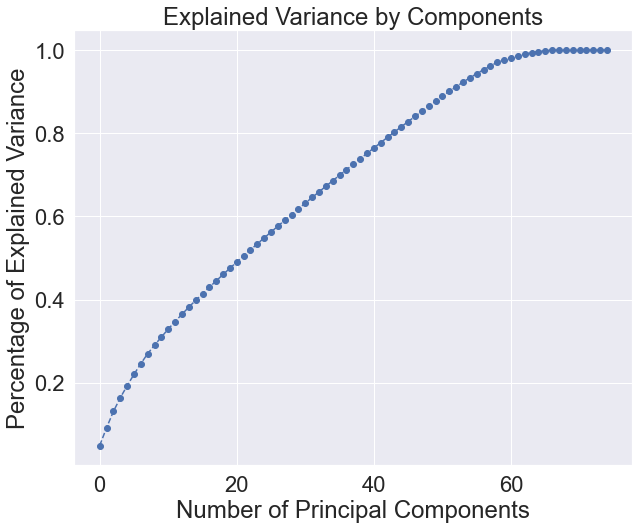

In [38]:
# Plot Explained Variance Ratio to identify number PCA components to use
figure(figsize =(10, 8))
plot(range(0,75),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
# labeling title,x and y axis
title('Explained Variance by Components')
xlabel('Number of Principal Components')
ylabel('Percentage of Explained Variance')

In [39]:
pca = PCA(n_components = 0.90)
pca.fit(dataset_scaled)
pca.explained_variance_ratio_

array([0.0487746 , 0.04268011, 0.03920917, 0.03299311, 0.02876813,
       0.02757756, 0.02575978, 0.02399116, 0.0205    , 0.01959365,
       0.01914759, 0.01815403, 0.01738294, 0.01721684, 0.01631051,
       0.01587558, 0.01566521, 0.01547691, 0.01524378, 0.01507656,
       0.01493599, 0.01471801, 0.01457839, 0.01451635, 0.01426023,
       0.01417787, 0.01413079, 0.01397382, 0.01392681, 0.01380634,
       0.01368799, 0.01360143, 0.01352377, 0.01344238, 0.01333194,
       0.01329894, 0.01320889, 0.01315778, 0.01309494, 0.01299651,
       0.01299027, 0.0129361 , 0.0128496 , 0.01273426, 0.0125283 ,
       0.01246896, 0.01239127, 0.01225611, 0.01223879, 0.01209492,
       0.01194578, 0.01176309])

In [40]:
dataset_scaled_pca = pca.transform(dataset_scaled)
dataset_scaled_pca.shape

(8205, 52)

In [41]:
# Create train and test datasets for cross validation using the scaled data
X= dataset_scaled_pca
Y= dataset['Revenue']
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=7)

**Logistic Regression**

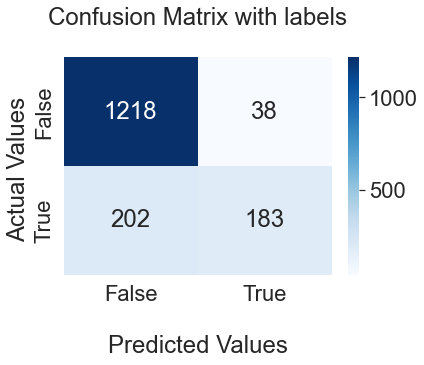


Train Data Scores
Accuracy:  84.99
Precision:  79.89
Recall:  47.21

Test Data Scores
Accuracy:  85.37
Precision:  82.81
Recall:  47.53


In [42]:
# Logistic Regression
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state = 7)

# KFold Cross Validation approach
kf_lr = KFold(n_splits=5,shuffle=True)
kf_lr.split(X_train)    
 
# Iterate over each train-test split
for train_index, test_index in kf_lr.split(X_train):
    # Train the model
    logreg.fit(X_train,Y_train)

#
Y_LR=logreg.predict(X_test)
print_confusion_matrix(confusion_matrix(Y_test,Y_LR))

print('\n','Train Data Scores',sep = '')
print('Accuracy: ',round(accuracy_score(Y_train, logreg.predict(X_train), normalize=True)*100,2))
print('Precision: ',round(precision_score(Y_train, logreg.predict(X_train))*100,2))
print('Recall: ',round(recall_score(Y_train, logreg.predict(X_train))*100,2))

print('\n','Test Data Scores',sep = '')
print('Accuracy: ',round(accuracy_score(Y_test, logreg.predict(X_test), normalize=True)*100,2))
print('Precision: ',round(precision_score(Y_test, logreg.predict(X_test))*100,2))
print('Recall: ',round(recall_score(Y_test, logreg.predict(X_test))*100,2))

**Support Vector Machine**

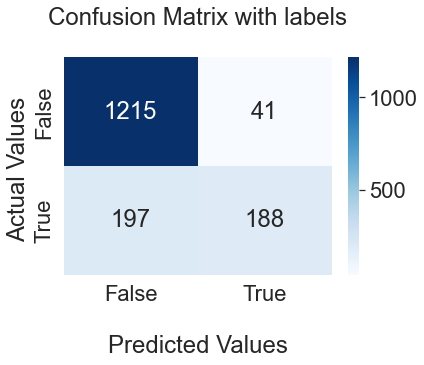


Train Data Scores
Accuracy:  86.52
Precision:  83.3
Recall:  52.4

Test Data Scores
Accuracy:  85.5
Precision:  82.1
Recall:  48.83


In [43]:
# Support Vector Machine Model for prediction 
model_svc = svm.SVC(kernel='rbf')
# KFold Cross Validation approach
kf_svm = KFold(n_splits=5,shuffle=True)
kf_svm.split(X_train)    
 
# Iterate over each train-test split
for train_index, test_index in kf_svm.split(X_train):
    # Train the model
    model_svm = model_svc.fit(X_train,Y_train)

# prediction using Decision tree    
Y_SVM = model_svm.predict(X_test)
print_confusion_matrix(confusion_matrix(Y_test,Y_SVM))

print('\n','Train Data Scores',sep = '')
print('Accuracy: ',round(accuracy_score(Y_train, model_svm.predict(X_train), normalize=True)*100,2))
print('Precision: ',round(precision_score(Y_train, model_svm.predict(X_train))*100,2))
print('Recall: ',round(recall_score(Y_train, model_svm.predict(X_train))*100,2))

print('\n','Test Data Scores',sep = '')
print('Accuracy: ',round(accuracy_score(Y_test, model_svm.predict(X_test), normalize=True)*100,2))
print('Precision: ',round(precision_score(Y_test, model_svm.predict(X_test))*100,2))
print('Recall: ',round(recall_score(Y_test, model_svm.predict(X_test))*100,2))